In [ ]:
# %cd /content

# !curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash
# %pip install git+https://github.com/haven-jeon/PyKoSpacing.git
# %pip install git+https://github.com/ssut/py-hanspell.git
# %pip install kss


/content
--2023-04-07 00:26:49--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2023-04-07 00:26:49--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc764df0759075e0facd9e09383.dl.dropboxusercontent.com/cd/0/get/B5v2yEv8zhMlr9OZBw75c42vNs0p5gTmfca5Ft6HImRfDzWAdMoP4MSak-FMMyqb4cBlPnOAs0pCujbM5CiIZqU_hp57STm2aq8ZmUmLuW--zhpexNANyV4BVHeQPjkTMUhqg_7J8XpTMRxf2uCls3kriefJ-RATsEFe0vAQcYMRYnLbmsYvj6eDBxJf7-yNrR8/file?dl=1# [following]
--2023-04-07 00:26:49--  https://ucc764df0759075e0facd9e09383.dl.dropboxusercontent.com/cd/0/get/B5v

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-swyt1a43
  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-swyt1a43
  Resolved https://github.com/ssut/py-hanspell.git to commit 8e993cf46f97f9d665c15633a0fc78ac1b727713
  Preparing metadata (setup.py) ... done
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4835 sha256=7f236289e1672a9074ad9c9234ebb492e45eab97b1df34ce3e31609060075501
  Stored in directory: /tmp/pip-ephem-wheel-cache-mzx6g6of/wheels/94/bc/ef/2cb90c305d609f8086489e7e1bd69f21e955118f26938609b7
Successfully built py-hanspell
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.7/77.7 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━

# Libraries import

In [ ]:
import os
import random
from tqdm import tqdm
import re
from collections import Counter
import pickle

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import konlpy
from konlpy.tag import Mecab, Okt

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('treebank')

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize

# from pykospacing import Spacing

# import kss

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


# Data load

In [ ]:
train_data = pd.read_csv("/content/drive/Othercomputers/내 Mac/Active/Aivle/4rd miniproject/4-2/train.csv", delimiter=",")
test_data = pd.read_csv("/content/drive/Othercomputers/내 Mac/Active/Aivle/4rd miniproject/4-2/test.csv", delimiter=",")

test_data.reset_index(drop=True, inplace=True)
test_data.drop("id", axis=1, inplace=True)

display(train_data.head())
display(test_data.head())

print(len(train_data))
print(len(test_data))

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2


,text
0,팀즈는 노트북으로 접속하고 강의는 데스크톱 이용하려고 하는데 문제는 없을까요? 이...
1,"셀프테스트에서 받은 점수가 해당 교육을 이수하고, 취업 연계등을 하는데 있어서 영향..."
2,a= int(input('정수 A의 값을 입력하시오.:'))\nb= int(inpu...
3,"def max4(a,b,c,d):\n maximum = a\n if b&..."
4,i**=2 가 i **=2 와 왜 같은지가 이해가 잘 안됩니다!!


3706
929


# Dropna

In [ ]:
print(train_data.isnull().sum())
train_data.dropna(inplace=True)
print(train_data.isnull().sum())

# reset index
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

text     0
label    0
dtype: int64
text     0
label    0
dtype: int64


# url 주소 제거

In [ ]:
def remove_url(sentence):
    """
    URL을 제거합니다.
    ''주소 : www.naver.com'' -> ''주소 : ''
    """
    preprocessed_text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", '', sentence) # http로 시작되는 url
    preprocessed_text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", '', preprocessed_text) # http로 시작되지 않는 url
    
    return preprocessed_text

train_data['text'] = train_data["text"].apply(remove_url)
test_data['text'] = test_data["text"].apply(remove_url)

display(train_data.head())
display(test_data.head())

,text,label
0,"= nn.ModuleList([, Co, (K, 100)) for K in Ks]...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 포함되면 제대로 작동하지 않...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2


,text
0,팀즈는 노트북으로 접속하고 강의는 데스크톱 이용하려고 하는데 문제는 없을까요? 이...
1,"셀프테스트에서 받은 점수가 해당 교육을 이수하고, 취업 연계등을 하는데 있어서 영향..."
2,a= int(input('정수 A의 값을 입력하시오.:'))\nb= int(inpu...
3,"def max4(a,b,c,d):\n maximum = a\n if b&..."
4,i**=2 가 i **=2 와 왜 같은지가 이해가 잘 안됩니다!!


# 이메일 주소 제거

In [ ]:
def remove_email(sentence):
    
    preprocessed_text = re.sub(r"[a-zA-Z0-9+-_.]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+", "", sentence).strip()
    
    return preprocessed_text

train_data['text'] = train_data["text"].apply(remove_email)
test_data['text'] = test_data["text"].apply(remove_email)

display(train_data.head())
display(test_data.head())

,text,label
0,"= nn.ModuleList([, Co, (K, 100)) for K in Ks])...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 포함되면 제대로 작동하지 않는...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2


,text
0,팀즈는 노트북으로 접속하고 강의는 데스크톱 이용하려고 하는데 문제는 없을까요? 이...
1,"셀프테스트에서 받은 점수가 해당 교육을 이수하고, 취업 연계등을 하는데 있어서 영향..."
2,a= int(input('정수 A의 값을 입력하시오.:'))\nb= int(inpu...
3,"def max4(a,b,c,d):\n maximum = a\n if b&..."
4,i**=2 가 i **=2 와 왜 같은지가 이해가 잘 안됩니다!!


# 특수문자 제거

In [ ]:
def remove_special(sentence):
    """
    특수문자를 제거합니다.
    """
    preprocessed_text = re.sub('[-=+,%#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', '', sentence)
    
    return preprocessed_text

train_data['text'] = train_data['text'].apply(lambda x: remove_special(x))
test_data['text'] = test_data['text'].apply(lambda x: remove_special(x))

display(train_data.head())
display(test_data.head())

,text,label
0,nnModuleList Co K 100 for K in Ks\n1 여기서 커널사이...,코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,를 사용할 때 질문입니다\n\nPATH에 가 포함되면 제대로 작동하지 않는 것 ...,코드2
3,tmpp tmpgroupbyby Addr1 as_indexFalseCategor...,코드2
4,filename TEST_IMAGE strroundframe_sec jpg\n...,코드2


,text
0,팀즈는 노트북으로 접속하고 강의는 데스크톱 이용하려고 하는데 문제는 없을까요 이 ...
1,셀프테스트에서 받은 점수가 해당 교육을 이수하고 취업 연계등을 하는데 있어서 영향을...
2,a intinput정수 A의 값을 입력하시오\nb intinput정수 B의 값을 입...
3,def max4abcd\n maximum a\n if b&gt;maxi...
4,i2 가 i 2 와 왜 같은지가 이해가 잘 안됩니다


# 숫자 제거

In [ ]:
def remove_numbers(text) :
    number_pattern = r'\d+'
    without_number = re.sub(pattern = number_pattern, repl = " ", string = text)
    return without_number

train_data['text'] = train_data['text'].apply(lambda x : remove_numbers(x))
test_data['text'] = test_data['text'].apply(lambda x : remove_numbers(x))

display(train_data.head())
display(test_data.head())

,text,label
0,nnModuleList Co K for K in Ks\n 여기서 커널사이즈 ...,코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,를 사용할 때 질문입니다\n\nPATH에 가 포함되면 제대로 작동하지 않는 것 ...,코드2
3,tmpp tmpgroupbyby Addr as_indexFalseCategor...,코드2
4,filename TEST_IMAGE strroundframe_sec jpg\n...,코드2


,text
0,팀즈는 노트북으로 접속하고 강의는 데스크톱 이용하려고 하는데 문제는 없을까요 이 ...
1,셀프테스트에서 받은 점수가 해당 교육을 이수하고 취업 연계등을 하는데 있어서 영향을...
2,a intinput정수 A의 값을 입력하시오\nb intinput정수 B의 값을 입...
3,def max abcd\n maximum a\n if b&gt;maxi...
4,i 가 i 와 왜 같은지가 이해가 잘 안됩니다


# 원하는 품사만 추출

In [ ]:
from konlpy.tag import Okt

okt = Okt()
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [ ]:
def filter_pos(sentence):
    okt = Okt()
    pos_result = okt.pos(sentence)
    
    selected_pos = ["Noun", "Verb", "Adjective", "Adverb", "Alpha"]
    filtered_words = [word for word, pos in pos_result if pos in selected_pos]
    
    return filtered_words

train_data['text'] = train_data['text'].apply(lambda x: filter_pos(x))
test_data['text'] = test_data['text'].apply(lambda x: filter_pos(x))

display(train_data.head())
display(test_data.head())

,text,label
0,"[nnModuleList, Co, K, for, K, in, Ks, 여기, 커널, ...",코드2
1,"[현재, 이미지, 개, 업로드, 하기, 위해, 자바스크립트, 적, 폼, 개, 생, ...",웹
2,"[를, 사용, 할, 때, 질문, 입니다, PATH, 가, 포함, 되면, 제대로, 작...",코드2
3,"[tmpp, tmpgroupbyby, Addr, as, indexFalseCateg...",코드2
4,"[filename, TEST, IMAGE, strroundframe, sec, jp...",코드2


,text
0,"[팀즈, 노트북, 접속, 강의, 데스크톱, 이용, 하려고, 하는데, 문제, 없을까요..."
1,"[셀프, 테스트, 받은, 점수, 해당, 교육, 이수, 취업, 계등, 하는데, 있어서..."
2,"[a, intinput, 정수, A, 의, 값, 입력, 하시오, b, intinpu..."
3,"[def, max, abcd, maximum, a, if, b, gt, maximu..."
4,"[i, 가, i, 와, 왜, 같은지가, 이해, 잘, 안됩니다]"


# 불용어 제거

In [ ]:
stopwords = pd.read_csv("/content/drive/Othercomputers/내 Mac/Active/Aivle/4rd miniproject/4-2/stopwords_kor.txt", header = None)
stopwords = stopwords[0].tolist()

alpha_stopwords = "것 하는 수 를"
alpha_stopwords = alpha_stopwords.split(" ")

custom_stopwords = list(set(alpha_stopwords + stopwords))

# 불용어 제거
def remove_stopwords(sentence):
    filtered_words = [word for word in sentence if word not in custom_stopwords]
    return filtered_words

train_data['text'] = train_data['text'].apply(lambda x: remove_stopwords(x))
test_data['text'] = test_data['text'].apply(lambda x: remove_stopwords(x))

display(train_data.head())
display(test_data.head())

,text,label
0,"[nnModuleList, Co, K, for, K, in, Ks, 커널, 사이즈,...",코드2
1,"[현재, 이미지, 개, 업로드, 하기, 위해, 자바스크립트, 적, 폼, 개, 생, ...",웹
2,"[사용, 할, 질문, 입니다, PATH, 포함, 되면, 제대로, 작동, 하지, 않는...",코드2
3,"[tmpp, tmpgroupbyby, Addr, as, indexFalseCateg...",코드2
4,"[filename, TEST, IMAGE, strroundframe, sec, jp...",코드2


,text
0,"[팀즈, 노트북, 접속, 강의, 데스크톱, 이용, 하려고, 하는데, 문제, 없을까요..."
1,"[셀프, 테스트, 받은, 점수, 해당, 교육, 이수, 취업, 계등, 하는데, 있어서..."
2,"[a, intinput, 정수, A, 값, 입력, 하시오, b, intinput, ..."
3,"[def, max, abcd, maximum, a, if, b, gt, maximu..."
4,"[i, i, 같은지가, 이해, 잘, 안됩니다]"


# 빈도수 확인 후 제거

In [ ]:
word_counter = Counter()

for index, row in train_data.iterrows():
    words = row['text']
    word_counter.update(row['text'])
    
print(word_counter)

Counter({'in': 909, '값': 814, '데이터': 775, '코드': 703, '문제': 665, '요': 654, '실습': 609, '드립니다': 602, 'x': 580, '할': 575, 'if': 567, '파일': 553, 'for': 544, 'gt': 525, '안녕하세요': 520, '부분': 515, '질문': 504, '오류': 504, 'a': 504, '하면': 492, 'i': 488, '경우': 463, '확인': 449, '문의': 435, '사용': 434, '진행': 429, '해야': 418, '감사합니다': 402, '입력': 390, '번': 377, '해서': 376, '실행': 369, '있을까요': 367, 'y': 365, '궁금합니다': 360, 'train': 360, '다시': 358, '했는데': 357, '제출': 349, '있는': 339, '이해': 338, '출력': 335, '합니다': 332, '모델': 330, '개': 325, '결과': 314, '방법': 306, '된': 304, '변수': 297, 'df': 297, 'test': 289, '에러': 287, '잘': 285, '이렇게': 276, '후': 276, '같은': 267, '입니다': 266, 'Python': 261, '중': 260, '해결': 257, '하여': 256, '작성': 255, '위': 250, '해당': 247, '되는': 247, 'n': 246, '알': 239, '는': 232, '추가': 232, '안': 225, '될까': 225, '처리': 223, '했습니다': 222, '발생': 222, 'import': 220, '강사': 219, 'b': 219, 'line': 219, '건가': 218, '모르겠습니다': 217, '시': 215, '가요': 212, '뜹니다': 209, 'File': 207, '하는데': 204, '되지': 204, '함수': 202, 'C': 199, 

<Axes: ylabel='Count'>

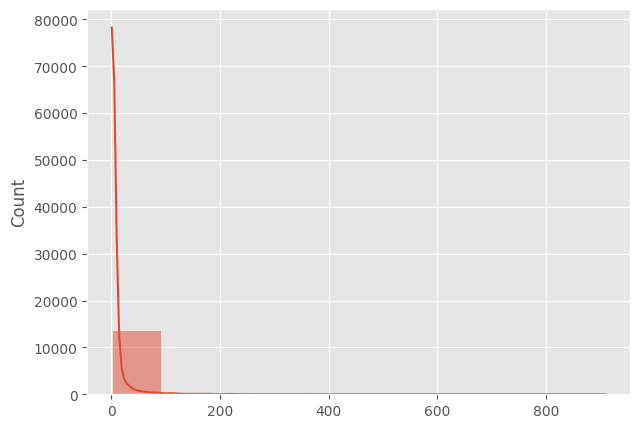

In [ ]:
word_frequencies = np.array(list(word_counter.values()))
mean = np.mean(word_frequencies)

plt.figure(figsize=(7, 5))
plt.style.use('ggplot')
sns.histplot(word_frequencies, bins=10, kde=True)

In [ ]:
# 제거
def remove_low_frequency_words(sentence, word_counter, number):
    filtered_words = [word for word in sentence if word_counter[word] > number]
    return ' '.join(filtered_words)

train_data['text'] = train_data['text'].apply(lambda x: remove_low_frequency_words(x, word_counter, 2))
test_data['text'] = test_data['text'].apply(lambda x: remove_low_frequency_words(x, word_counter, 2))

display(train_data.head())
display(test_data.head())

,text,label
0,K for K in 커널 사이즈 K 은 한 단어 최대 길이 않는다는 가정 그냥 선언...,코드2
1,현재 이미지 개 업로드 하기 위해 자바스크립트 적 개 생 클릭 해도 생 안되네요 막...,웹
2,사용 할 질문 입니다 PATH 포함 되면 제대로 작동 하지 않는 같아 질문 드립니다...,코드2
3,Addr as Addr pltticklabel formataxisy stylepla...,코드2
4,filename TEST IMAGE strroundframe sec jpg 이렇게 ...,코드2


,text
0,노트북 접속 강의 이용 하려고 하는데 문제 없을까요 경우 다운 받아야 되는 파일 있...
1,셀프 테스트 받은 점수 해당 교육 하는데 있어서 영향 미치는 요소
2,a intinput 정수 A 값 입력 하시오 b intinput 정수 B 값 입력 ...
3,def max maximum a if b gt maximum if c gt maxi...
4,i i 이해 잘 안됩니다


# Dropna

In [ ]:
## 값 없음 to np.nan
train_data['text'].replace("", np.nan, inplace = True)
train_data.dropna(inplace=True)

print(test_data.isnull().sum())
test_data['text'].replace(np.nan, '', inplace=True)

text    0
dtype: int64


# Save

In [ ]:
train_data.to_csv("/content/drive/train_preprocessed.csv", index=False)
test_data.to_csv("/content/drive/test_preprocessed.csv", index=False)